# **1. Perkenalan Dataset**


## Dataset: Climate Change Impact on Agriculture 2024

**Author**: Zidan Mubarak  
**Sumber**: Kaggle - Climate Change Impact on Agriculture Dataset  

---

### Deskripsi Dataset

Dataset ini berisi data tentang **dampak perubahan iklim terhadap hasil pertanian** di berbagai negara dan region dari tahun 1990-2024. Dataset ini mencakup informasi tentang kondisi iklim, penggunaan sumber daya pertanian, dan hasil panen.

### Karakteristik Dataset

- **Jumlah Baris**: 10,002 observasi
- **Jumlah Kolom**: 15 fitur
- **Tipe Data**: Structured data (tabular)
- **Format**: CSV
- **Ukuran**: ~1 MB

### Fitur-Fitur Dataset

1. **Year**: Tahun pengamatan (1990-2024)
2. **Country**: Negara tempat pengamatan
3. **Region**: Region dalam negara
4. **Crop_Type**: Jenis tanaman (Corn, Wheat, Rice, Cotton, Soybeans, dll)
5. **Average_Temperature_C**: Suhu rata-rata (°C)
6. **Total_Precipitation_mm**: Curah hujan total (mm)
7. **CO2_Emissions_MT**: Emisi CO2 (Metric Tons)
8. **Crop_Yield_MT_per_HA**: **Target Variable** - Hasil panen (Metric Tons per Hectare)
9. **Extreme_Weather_Events**: Jumlah kejadian cuaca ekstrem
10. **Irrigation_Access_%**: Persentase akses irigasi
11. **Pesticide_Use_KG_per_HA**: Penggunaan pestisida (KG per Hectare)
12. **Fertilizer_Use_KG_per_HA**: Penggunaan pupuk (KG per Hectare)
13. **Soil_Health_Index**: Indeks kesehatan tanah (0-100)
14. **Adaptation_Strategies**: Strategi adaptasi perubahan iklim
15. **Economic_Impact_Million_USD**: Dampak ekonomi (juta USD)

### Tujuan Analisis

1. Memahami karakteristik dataset melalui EDA
2. Mengidentifikasi pola dan korelasi antar fitur
3. Melakukan preprocessing data untuk model machine learning
4. Mempersiapkan data untuk prediksi hasil panen (regression task)

### Use Case

- **Regression**: Prediksi hasil panen berdasarkan kondisi iklim dan praktik pertanian
- **Classification**: Kategorisasi tingkat hasil panen (Low, Medium, High, Very High)
- **Time Series Analysis**: Analisis trend perubahan iklim dan dampaknya terhadap pertanian

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Settings
import warnings
warnings.filterwarnings('ignore')

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plot Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Load dataset
df = pd.read_csv('../climate_change_raw.csv')

print("=" * 70)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 70)
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print("=" * 70)

DATASET LOADED SUCCESSFULLY
Shape: (10000, 15)
Rows: 10,000
Columns: 15


In [4]:
# Display first few rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
5,2019,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
6,1997,Argentina,Northeast,Fruits,23.46,1816.41,27.70,1.611,2,20.22,0.56,28.72,79.09,Organic Farming,480.61
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-resistant Crops,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,1,45.87,10.09,32.54,42.31,Water Management,761.89
9,2018,Nigeria,North West,Barley,21.23,475.32,25.74,0.765,1,25.74,44.38,72.92,84.21,No Adaptation,167.21


In [5]:
# Display last few rows
print("Last 10 rows:")
df.tail(10)

Last 10 rows:


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
9990,2004,China,Central,Rice,16.17,2571.78,1.56,4.530,8,83.76,6.40,54.79,44.81,No Adaptation,981.05
9991,2016,China,East,Barley,-3.44,2997.57,20.18,1.197,6,99.98,30.65,87.87,55.42,Drought-resistant Crops,181.28
9992,1995,France,Grand Est,Soybeans,3.82,762.69,9.13,1.100,9,89.83,3.42,59.99,88.75,Organic Farming,227.30
9993,1990,France,Ile-de-France,Coffee,16.52,2102.28,16.42,2.448,0,51.34,44.54,79.02,91.99,No Adaptation,523.60
9994,2011,China,North,Coffee,15.26,2770.64,13.65,3.010,6,85.45,43.00,5.64,95.09,Water Management,1047.69
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90
9999,2015,China,South,Corn,11.78,1676.25,5.34,3.710,5,46.41,48.28,98.27,59.38,Water Management,453.14


In [6]:
# Random sample
print("Random sample (10 rows):")
df.sample(10)

Random sample (10 rows):


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
677,2005,Russia,Siberian,Sugarcane,2.11,623.08,18.35,1.809,7,55.89,2.58,46.55,91.45,Crop Rotation,776.18
194,2008,USA,West,Barley,24.57,1212.42,4.38,3.000,2,34.16,39.46,69.50,85.01,Organic Farming,1374.56
6672,2020,China,South,Cotton,11.26,955.41,26.09,3.960,2,73.50,31.81,73.68,39.70,No Adaptation,1779.78
4596,2001,Canada,Ontario,Wheat,24.89,2368.80,17.41,2.772,0,13.87,33.91,45.23,92.21,Drought-resistant Crops,1175.85
1759,1990,Russia,Central,Rice,34.78,1103.53,8.05,1.200,9,95.71,9.66,18.72,85.83,No Adaptation,540.27
7769,2015,Brazil,North,Wheat,22.14,1736.66,24.20,3.069,6,90.62,4.40,88.95,54.79,Crop Rotation,693.32
8081,1999,Russia,Volga,Soybeans,13.50,492.55,20.67,2.538,9,17.43,29.99,75.37,74.49,Organic Farming,834.77
2867,2023,Brazil,North,Barley,7.25,1135.22,7.75,2.360,7,30.22,23.84,33.14,66.56,Crop Rotation,902.35
7639,1990,Argentina,Northeast,Corn,11.81,2412.68,21.37,1.719,9,13.86,33.40,97.57,54.26,Water Management,275.96
2071,2008,Nigeria,South West,Rice,16.03,973.37,4.11,1.970,4,72.92,5.63,39.56,84.25,No Adaptation,646.92


In [7]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 

In [8]:
# Column names and data types
print("Column Names and Data Types:")
print("=" * 70)
for col, dtype in df.dtypes.items():
    print(f"{col:35s} : {dtype}")

Column Names and Data Types:
Year                                : int64
Country                             : object
Region                              : object
Crop_Type                           : object
Average_Temperature_C               : float64
Total_Precipitation_mm              : float64
CO2_Emissions_MT                    : float64
Crop_Yield_MT_per_HA                : float64
Extreme_Weather_Events              : int64
Irrigation_Access_%                 : float64
Pesticide_Use_KG_per_HA             : float64
Fertilizer_Use_KG_per_HA            : float64
Soil_Health_Index                   : float64
Adaptation_Strategies               : object
Economic_Impact_Million_USD         : float64


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Missing Values Analysis

In [9]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})

print("Missing Values Summary:")
print("=" * 70)
print(missing_df[missing_df['Missing_Count'] > 0])

if missing.sum() == 0:
    print("\n✓ No missing values found!")
else:
    print(f"\n⚠ Total missing values: {missing.sum()}")

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

✓ No missing values found!


## 4.2 Statistical Summary

In [10]:
# Statistical summary for numerical columns
print("Statistical Summary (Numerical Features):")
df.describe()

Statistical Summary (Numerical Features):


,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [11]:
# Statistical summary for categorical columns
print("Statistical Summary (Categorical Features):")
df.describe(include='object')

Statistical Summary (Categorical Features):


,Country,Region,Crop_Type,Adaptation_Strategies
count,10000,10000,10000,10000
unique,10,34,10,5
top,Australia,South,Wheat,Water Management
freq,1032,754,1047,2049


## 4.3 Categorical Features Analysis

In [12]:
# Analyze categorical columns
categorical_cols = df.select_dtypes(include='object').columns

print("Categorical Columns Analysis:")
print("=" * 70)
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())

Categorical Columns Analysis:

Country:
  Unique values: 10
  Top 5 values:
Country
Australia    1032
USA          1032
China        1031
Nigeria      1029
India        1025
Name: count, dtype: int64

Region:
  Unique values: 34
  Top 5 values:
Region
South        754
Northeast    752
North        524
Central      466
Punjab       288
Name: count, dtype: int64

Crop_Type:
  Unique values: 10
  Top 5 values:
Crop_Type
Wheat         1047
Cotton        1044
Vegetables    1036
Corn          1022
Rice          1022
Name: count, dtype: int64

Adaptation_Strategies:
  Unique values: 5
  Top 5 values:
Adaptation_Strategies
Water Management           2049
No Adaptation              2024
Drought-resistant Crops    1995
Organic Farming            1975
Crop Rotation              1957
Name: count, dtype: int64


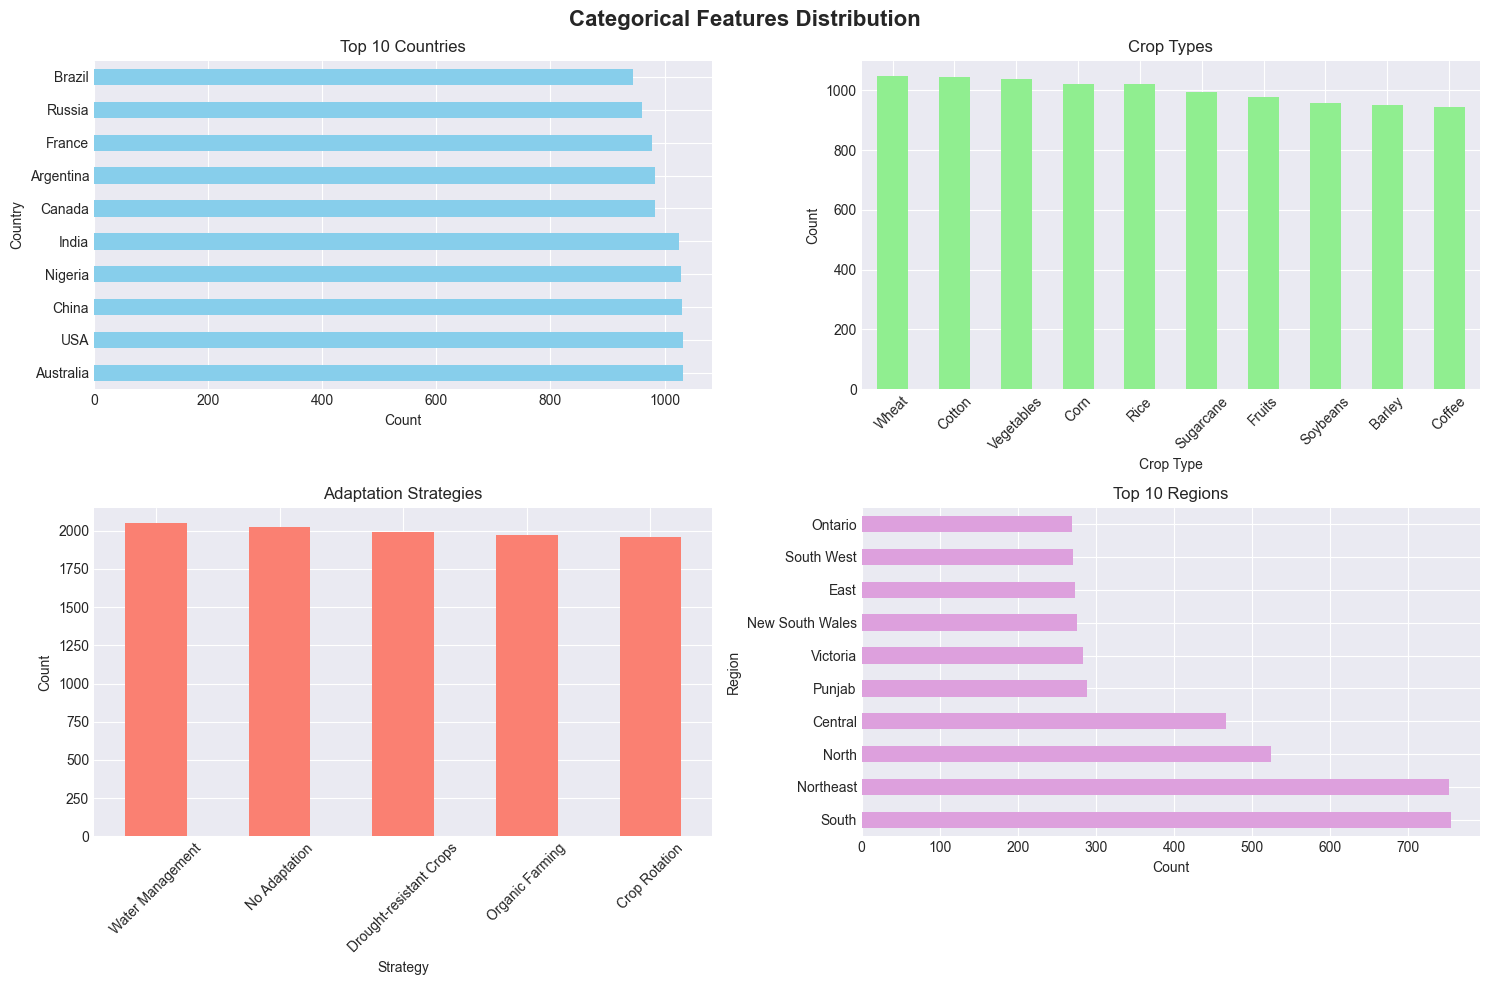

In [13]:
# Visualize categorical distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold')

# Country
df['Country'].value_counts().head(10).plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 10 Countries')
axes[0, 0].set_xlabel('Count')

# Crop Type
df['Crop_Type'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Crop Types')
axes[0, 1].set_xlabel('Crop Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Adaptation Strategies
df['Adaptation_Strategies'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Adaptation Strategies')
axes[1, 0].set_xlabel('Strategy')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Region (top 10)
df['Region'].value_counts().head(10).plot(kind='barh', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Top 10 Regions')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

## 4.4 Numerical Features Distribution

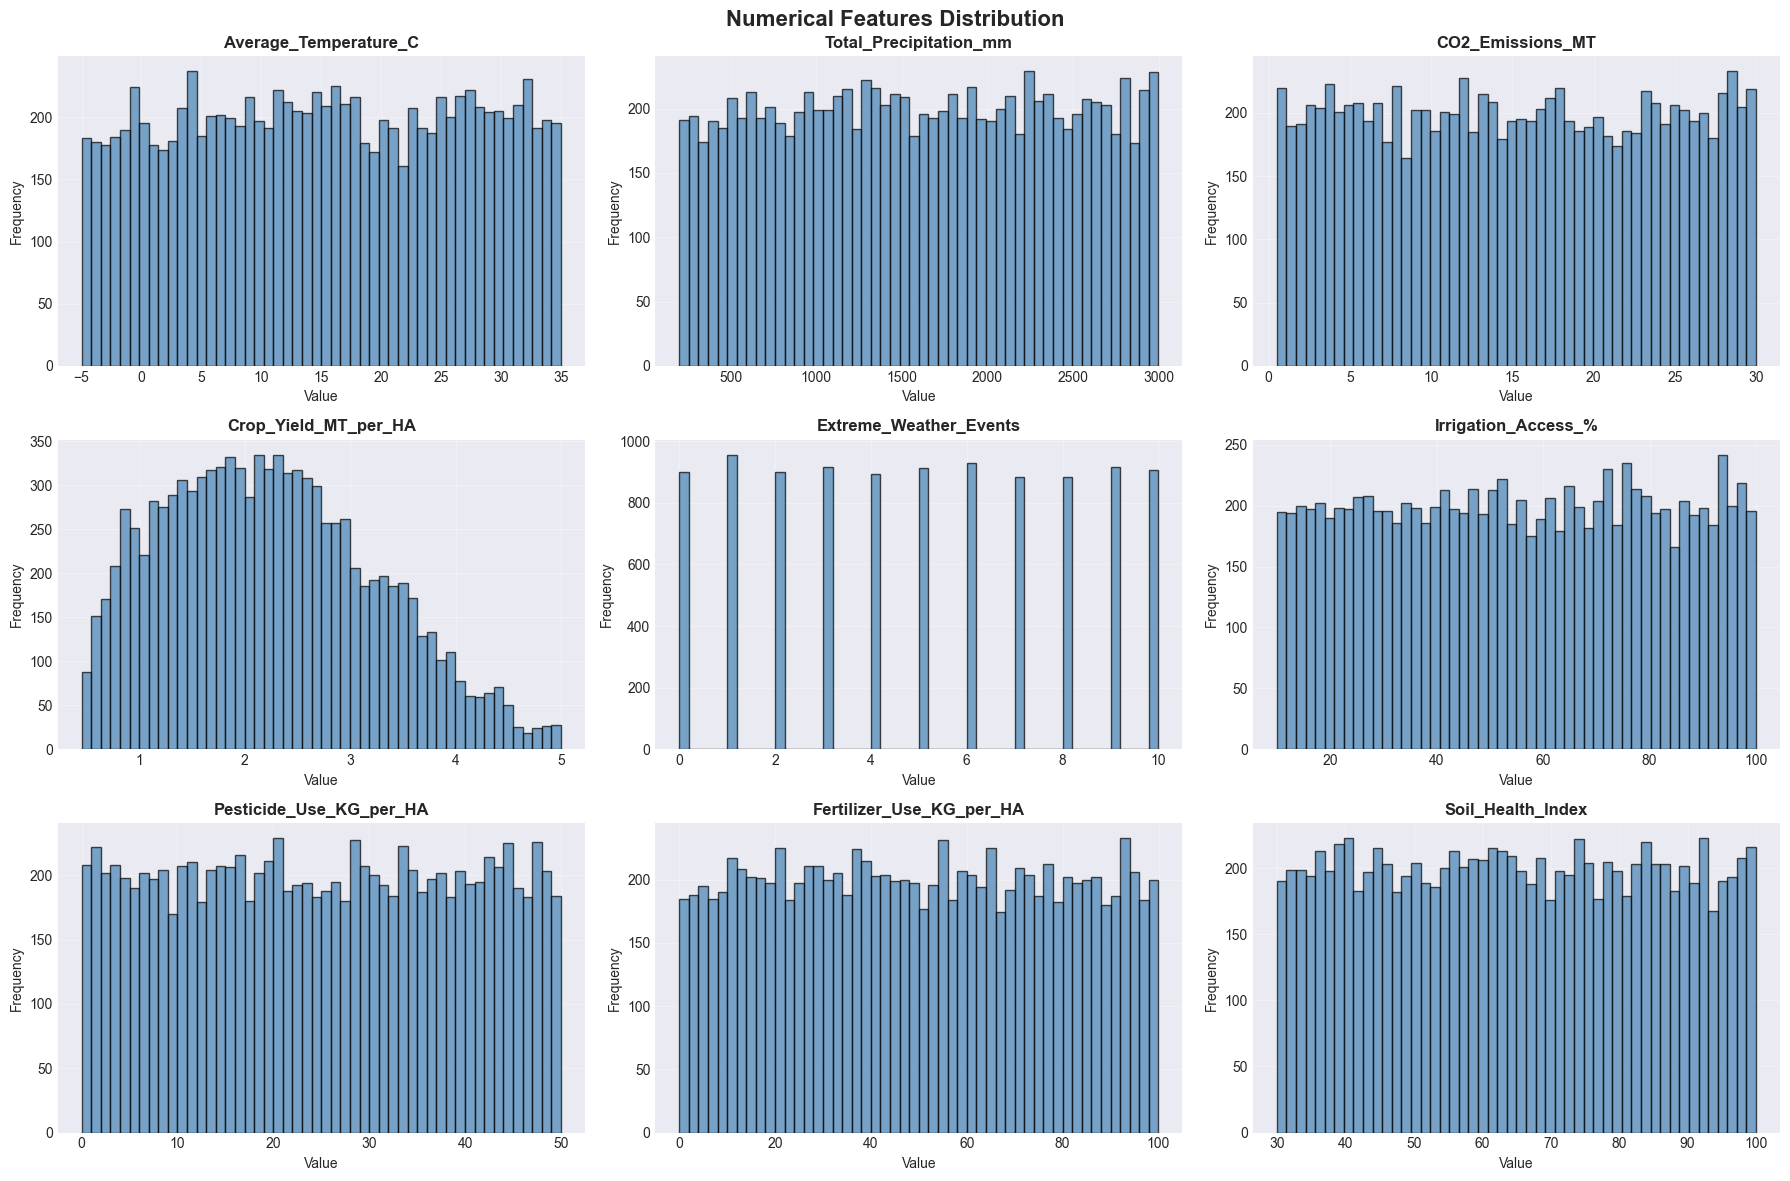

In [14]:
# Distribution plots for key numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Numerical Features Distribution', fontsize=16, fontweight='bold')

key_features = [
    'Average_Temperature_C',
    'Total_Precipitation_mm',
    'CO2_Emissions_MT',
    'Crop_Yield_MT_per_HA',
    'Extreme_Weather_Events',
    'Irrigation_Access_%',
    'Pesticide_Use_KG_per_HA',
    'Fertilizer_Use_KG_per_HA',
    'Soil_Health_Index'
]

for idx, col in enumerate(key_features):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(col, fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4.5 Target Variable Analysis

Target Variable: Crop_Yield_MT_per_HA
Statistics:
count    10000.000000
mean         2.240017
std          0.998342
min          0.450000
25%          1.449000
50%          2.170000
75%          2.930000
max          5.000000
Name: Crop_Yield_MT_per_HA, dtype: float64


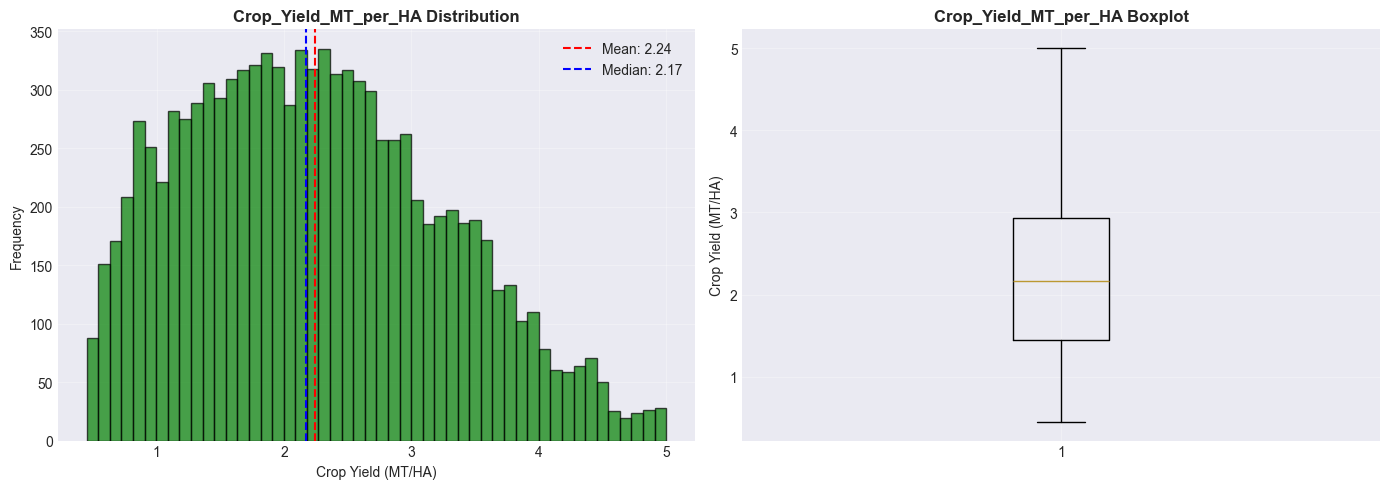

In [15]:
# Target variable: Crop_Yield_MT_per_HA
target = 'Crop_Yield_MT_per_HA'

print(f"Target Variable: {target}")
print("=" * 70)
print(f"Statistics:")
print(df[target].describe())

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[target], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title(f'{target} Distribution', fontweight='bold')
axes[0].set_xlabel('Crop Yield (MT/HA)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
axes[0].axvline(df[target].median(), color='blue', linestyle='--', label=f'Median: {df[target].median():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df[target], vert=True)
axes[1].set_title(f'{target} Boxplot', fontweight='bold')
axes[1].set_ylabel('Crop Yield (MT/HA)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4.6 Correlation Analysis

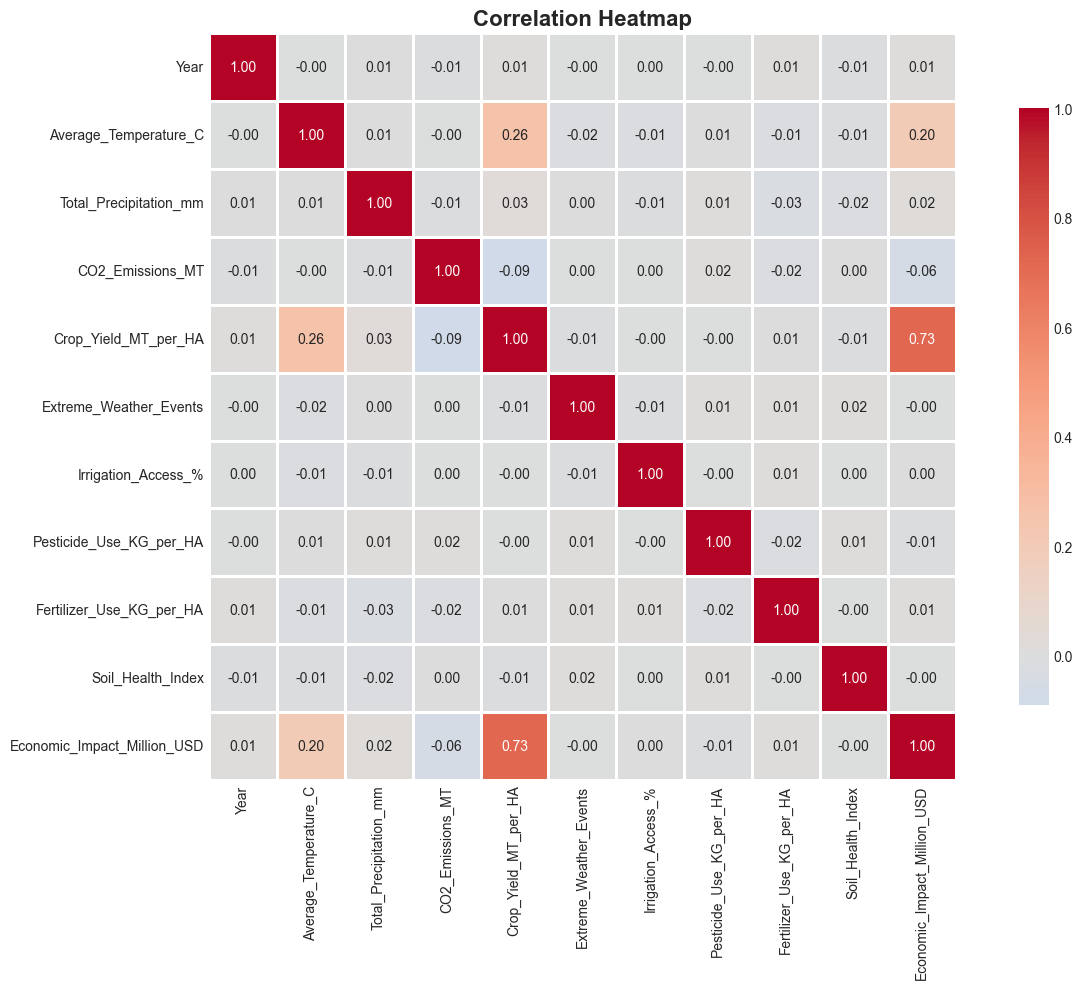

In [16]:
# Correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation with Crop_Yield_MT_per_HA:
Crop_Yield_MT_per_HA           1.000000
Economic_Impact_Million_USD    0.726358
Average_Temperature_C          0.263781
Total_Precipitation_mm         0.029728
Year                           0.010734
Fertilizer_Use_KG_per_HA       0.006423
Irrigation_Access_%           -0.000255
Pesticide_Use_KG_per_HA       -0.004035
Extreme_Weather_Events        -0.005094
Soil_Health_Index             -0.005692
CO2_Emissions_MT              -0.089868
Name: Crop_Yield_MT_per_HA, dtype: float64


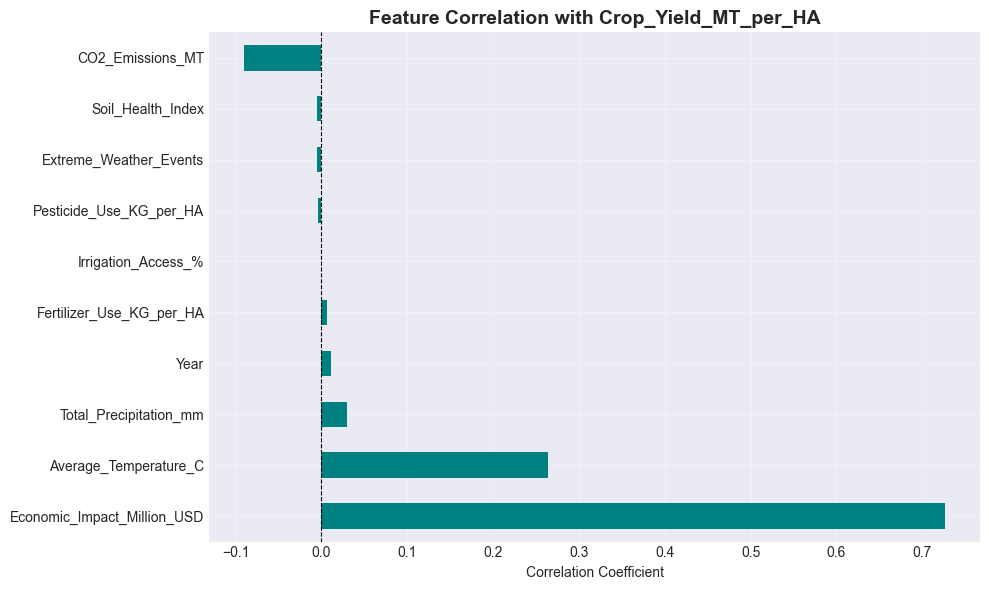

In [17]:
# Correlation with target variable
target_corr = correlation[target].sort_values(ascending=False)

print(f"Correlation with {target}:")
print("=" * 70)
print(target_corr)

# Plot
plt.figure(figsize=(10, 6))
target_corr.drop(target).plot(kind='barh', color='teal')
plt.title(f'Feature Correlation with {target}', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4.7 Outlier Detection

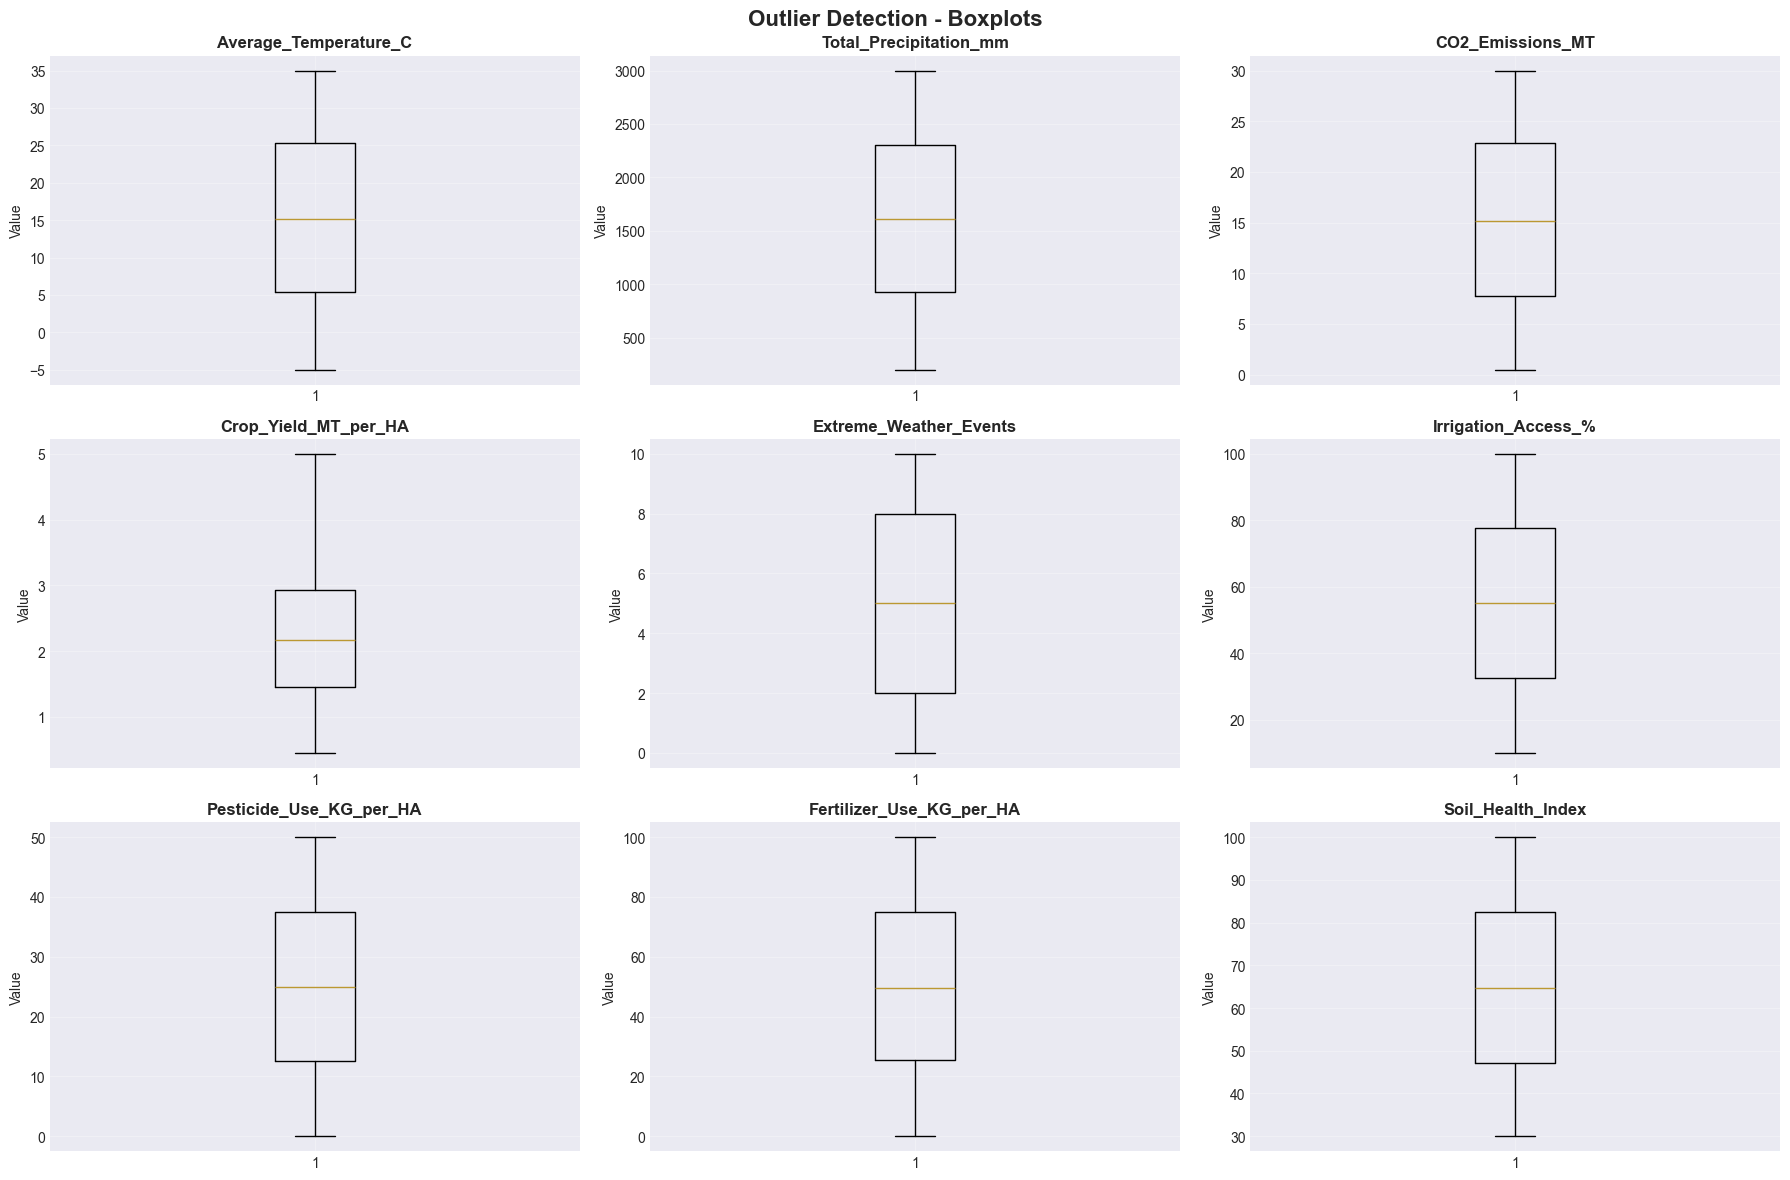

In [18]:
# Boxplots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection - Boxplots', fontsize=16, fontweight='bold')

for idx, col in enumerate(key_features):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].boxplot(df[col], vert=True)
    axes[row, col_idx].set_title(col, fontweight='bold')
    axes[row, col_idx].set_ylabel('Value')
    axes[row, col_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Count outliers using IQR method
print("Outlier Count (IQR Method):")
print("=" * 70)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(df)) * 100
    
    if outliers > 0:
        print(f"{col:35s}: {outliers:5d} ({outlier_pct:5.2f}%)")

Outlier Count (IQR Method):
Economic_Impact_Million_USD        :   177 ( 1.77%)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 5.1 Handle Missing Values

In [20]:
# Create a copy for preprocessing
df_processed = df.copy()

print("Original shape:", df.shape)

# Handle missing values (if any)
if df_processed.isnull().sum().sum() > 0:
    # Numerical: fill with median
    for col in numerical_cols:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"✓ Filled {col} with median: {median_val:.2f}")
    
    # Categorical: fill with mode
    for col in categorical_cols:
        if df_processed[col].isnull().sum() > 0:
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"✓ Filled {col} with mode: {mode_val}")
else:
    print("✓ No missing values to handle")

print("\nAfter handling missing values:", df_processed.shape)

Original shape: (10000, 15)
✓ No missing values to handle

After handling missing values: (10000, 15)


## 5.2 Handle Outliers

In [21]:
# Handle outliers using IQR method (capping)
print("Handling Outliers (Capping Method):")
print("=" * 70)

outliers_handled = 0

for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
    
    if outliers_before > 0:
        # Cap outliers
        df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
        outliers_handled += outliers_before
        print(f"✓ {col:35s}: {outliers_before} outliers capped")

print(f"\n✓ Total outliers handled: {outliers_handled}")

Handling Outliers (Capping Method):
✓ Economic_Impact_Million_USD        : 177 outliers capped

✓ Total outliers handled: 177


## 5.3 Feature Engineering

In [22]:
# Create new features
print("Creating New Features:")
print("=" * 70)

# 1. Temperature categories
df_processed['Temperature_Category'] = pd.cut(
    df_processed['Average_Temperature_C'],
    bins=[-np.inf, 10, 20, 30, np.inf],
    labels=['Cold', 'Moderate', 'Warm', 'Hot']
)
print("✓ Created Temperature_Category")

# 2. Precipitation categories
df_processed['Precipitation_Category'] = pd.cut(
    df_processed['Total_Precipitation_mm'],
    bins=[-np.inf, 500, 1500, 2500, np.inf],
    labels=['Low', 'Medium', 'High', 'Very_High']
)
print("✓ Created Precipitation_Category")

# 3. Yield categories
df_processed['Yield_Category'] = pd.cut(
    df_processed['Crop_Yield_MT_per_HA'],
    bins=[-np.inf, 1.5, 2.5, 3.5, np.inf],
    labels=['Low', 'Medium', 'High', 'Very_High']
)
print("✓ Created Yield_Category")

# 4. Climate stress indicator
df_processed['Climate_Stress'] = (
    (df_processed['Average_Temperature_C'] > 30).astype(int) +
    (df_processed['Total_Precipitation_mm'] < 500).astype(int) +
    (df_processed['Extreme_Weather_Events'] > 5).astype(int)
)
print("✓ Created Climate_Stress")

# 5. Resource efficiency
df_processed['Resource_Efficiency'] = (
    df_processed['Crop_Yield_MT_per_HA'] / 
    (df_processed['Fertilizer_Use_KG_per_HA'] + df_processed['Pesticide_Use_KG_per_HA'] + 1)
)
print("✓ Created Resource_Efficiency")

# 6. Environmental impact
df_processed['Environmental_Impact'] = (
    df_processed['CO2_Emissions_MT'] * 0.4 +
    df_processed['Pesticide_Use_KG_per_HA'] * 0.3 +
    df_processed['Fertilizer_Use_KG_per_HA'] * 0.3
)
print("✓ Created Environmental_Impact")

print(f"\n✓ Total features after engineering: {len(df_processed.columns)}")

Creating New Features:
✓ Created Temperature_Category
✓ Created Precipitation_Category
✓ Created Yield_Category
✓ Created Climate_Stress
✓ Created Resource_Efficiency
✓ Created Environmental_Impact

✓ Total features after engineering: 21


## 5.4 Encode Categorical Variables

In [23]:
# Label encoding for categorical variables
print("Encoding Categorical Variables:")
print("=" * 70)

label_encoders = {}
categorical_to_encode = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies',
                         'Temperature_Category', 'Precipitation_Category', 'Yield_Category']

for col in categorical_to_encode:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[f'{col}_Encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"✓ Encoded {col:35s} ({df_processed[col].nunique()} categories)")

print(f"\n✓ Total categorical columns encoded: {len(categorical_to_encode)}")

Encoding Categorical Variables:
✓ Encoded Country                             (10 categories)
✓ Encoded Region                              (34 categories)
✓ Encoded Crop_Type                           (10 categories)
✓ Encoded Adaptation_Strategies               (5 categories)
✓ Encoded Temperature_Category                (4 categories)
✓ Encoded Precipitation_Category              (4 categories)
✓ Encoded Yield_Category                      (4 categories)

✓ Total categorical columns encoded: 7


## 5.5 Feature Selection

In [24]:
# Select features for final dataset
numerical_features = [
    'Year',
    'Average_Temperature_C',
    'Total_Precipitation_mm',
    'CO2_Emissions_MT',
    'Extreme_Weather_Events',
    'Irrigation_Access_%',
    'Pesticide_Use_KG_per_HA',
    'Fertilizer_Use_KG_per_HA',
    'Soil_Health_Index',
    'Climate_Stress',
    'Resource_Efficiency',
    'Environmental_Impact'
]

encoded_features = [
    'Country_Encoded',
    'Region_Encoded',
    'Crop_Type_Encoded',
    'Adaptation_Strategies_Encoded',
    'Temperature_Category_Encoded',
    'Precipitation_Category_Encoded'
]

target_feature = 'Crop_Yield_MT_per_HA'

selected_features = numerical_features + encoded_features + [target_feature]

df_final = df_processed[selected_features].copy()

print(f"Selected Features:")
print(f"  Numerical: {len(numerical_features)}")
print(f"  Encoded: {len(encoded_features)}")
print(f"  Target: 1")
print(f"  Total: {len(selected_features)}")
print(f"\nFinal dataset shape: {df_final.shape}")

Selected Features:
  Numerical: 12
  Encoded: 6
  Target: 1
  Total: 19

Final dataset shape: (10000, 19)


## 5.6 Feature Scaling

In [25]:
# Scale features (except target)
scaler = StandardScaler()

features_to_scale = df_final.columns.drop(target_feature)

df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])

print(f"✓ Scaled {len(features_to_scale)} features using StandardScaler")
print(f"✓ Features now have mean ≈ 0 and std ≈ 1")

# Verify scaling
print("\nScaling Verification:")
print(df_final[features_to_scale].describe())

✓ Scaled 18 features using StandardScaler
✓ Features now have mean ≈ 0 and std ≈ 1

Scaling Verification:
               Year  Average_Temperature_C  Total_Precipitation_mm  \
count  1.000000e+04           1.000000e+04            1.000000e+04   
mean  -1.699618e-15           3.943512e-17            6.217249e-17   
std    1.000050e+00           1.000050e+00            1.000050e+00   
min   -1.694679e+00          -1.764401e+00           -1.753484e+00   
25%   -8.021527e-01          -8.556578e-01           -8.521569e-01   
50%   -8.796339e-03          -5.782033e-03           -6.258990e-04   
75%    8.837296e-01           8.807226e-01            8.637937e-01   
max    1.677086e+00           1.723185e+00            1.724281e+00   

       CO2_Emissions_MT  Extreme_Weather_Events  Irrigation_Access_%  \
count      1.000000e+04            1.000000e+04         1.000000e+04   
mean      -2.227551e-16           -1.190159e-17        -1.890044e-16   
std        1.000050e+00            1.000050e+00

## 5.7 Save Processed Data

In [26]:
# Save processed data
output_file = 'climate_change_preprocessing.csv'
df_final.to_csv(output_file, index=False)

print("=" * 70)
print("PREPROCESSING COMPLETED")
print("=" * 70)
print(f"✓ Processed data saved to: {output_file}")
print(f"✓ Shape: {df_final.shape}")
print(f"✓ File size: {df_final.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("=" * 70)

PREPROCESSING COMPLETED
✓ Processed data saved to: climate_change_preprocessing.csv
✓ Shape: (10000, 19)
✓ File size: 1484.50 KB


In [27]:
# Verify saved data
df_verify = pd.read_csv(output_file)

print("Verification:")
print(f"  Shape: {df_verify.shape}")
print(f"  Columns: {list(df_verify.columns)}")
print(f"\nFirst few rows:")
df_verify.head()

Verification:
  Shape: (10000, 19)
  Columns: ['Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Climate_Stress', 'Resource_Efficiency', 'Environmental_Impact', 'Country_Encoded', 'Region_Encoded', 'Crop_Type_Encoded', 'Adaptation_Strategies_Encoded', 'Temperature_Category_Encoded', 'Precipitation_Category_Encoded', 'Crop_Yield_MT_per_HA']

First few rows:


,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Climate_Stress,Resource_Efficiency,Environmental_Impact,Country_Encoded,Region_Encoded,Crop_Type_Encoded,Adaptation_Strategies_Encoded,Temperature_Category_Encoded,Precipitation_Category_Encoded,Crop_Yield_MT_per_HA
0,-0.603814,-1.194038,-1.446755,-0.003098,0.953706,-1.566488,-1.026604,-1.225852,0.908583,1.962501,0.567875,-1.481224,0.514475,1.647213,-0.891212,1.402922,-1.145884,-0.320327,1.737
1,1.677086,-1.047523,1.617322,1.696752,0.953706,-1.700786,0.559291,-0.930829,-0.538814,0.472937,-0.212706,0.023997,-0.181467,-0.835524,-0.891212,-1.426120,-1.145884,1.428182,1.737
2,-0.603814,0.511818,-0.385010,1.222890,0.006034,1.122548,0.169374,0.541850,0.142547,-1.016628,-0.467036,0.946444,0.166504,-1.249313,1.548459,1.402922,1.327959,0.553928,1.719
3,-0.603814,1.099623,-0.568096,-0.155619,0.006034,1.493503,-0.729852,1.309886,1.311656,-1.016628,-0.054457,0.746405,-0.529438,0.198950,-1.239736,-0.011599,1.327959,0.553928,3.890
4,-0.901322,-1.138223,0.019648,-0.400118,1.269597,1.558535,1.338437,1.327302,-0.757186,0.472937,-0.683139,1.564398,0.514475,1.233424,0.851410,-1.426120,-1.145884,-1.194581,1.080
